<table class="ee-notebook-buttons" align="left">
    <td><a target="_blank"  href="https://github.com/RISKYYS1996/ProjectModul2Purwadhika/blob/main/ProjectModul2_Risky.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a></td>
    <td><a target="_blank"  href="https://nbviewer.jupyter.org/github/RISKYYS1996/ProjectModul2Purwadhika/blob/main/ProjectModul2_Risky.ipynb"><img width=26px src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Jupyter_logo.svg/883px-Jupyter_logo.svg.png" />Notebook Viewer</a></td>
    <td><a target="_blank"  href="https://colab.research.google.com/github/RISKYYS1996/ProjectModul2Purwadhika/blob/main/ProjectModul2_Risky.ipynb"><img width=26px src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a></td>
</table>

# **General Question**
1. Bagaimana konteks bisnis berdasarkan dengan data yang telah diberikan? Silahkan buat asumsi atau penamaan jika diperlukan!
2. Ada berapa banyak tabel yang disediakan oleh database yang tersedia? Jabarkan setiap tabelnya. Jika terdapat ERD, silahkan ditampilkan!

## **DATA UNDERSTANDING**

## **Context**

Basis data Northwind berisi data penjualan untuk perusahaan fiktif bernama "Northwind Traders", yang mengimpor dan mengekspor makanan khusus dari seluruh dunia. Basis data Northwind adalah skema tutorial yang sangat baik untuk ERP bisnis kecil, dengan pelanggan, pesanan, inventaris, pembelian, pemasok, pengiriman, karyawan, dan akuntansi entri tunggal. Dari database tersebut, perusahaan ingin bisa mendapatkan insight yang dapat dijalankan, sehingga nantinya mereka dapat melakukan penerapan strategi yang tepat sasaran untuk memperoleh keuntungan yang lebih dari saat ini. Namun dari database tersebut, saat ini kita hanya fokus pada tabel pesanan dan tabel yang berkaitan sebagai bahan analisis dalam pengambilan kebijakan perusahaan.

## **Database Information**

Sumber Database: https://drive.google.com/file/d/1NxRXdvBW4WMtKQZzaxCN-MHR2EfQWC-K/view?usp=sharing 

Database yang akan dianalisis terdapat 4 tabel, yaitu:
- Orders        : Menyimpan informasi jual-beli yang dilakukan oleh pelanggan.
- OrderDetails  : Menyimpan detail dari setiap pesanan yang dilakukan oleh pelanggan.
- Shipper       : Menyimpan informasi nama-nama perusahaan pengirim/kurir/kargo.
- Customers     : Menyimpan detail informasi nama-nama pelanggan.

Setiap tabel yang tertera pada database dapat terhubung, baik secara langsung maupun tidak langsung, sehingga setiap informasi dari database ini akan dapat saling berkaitan.

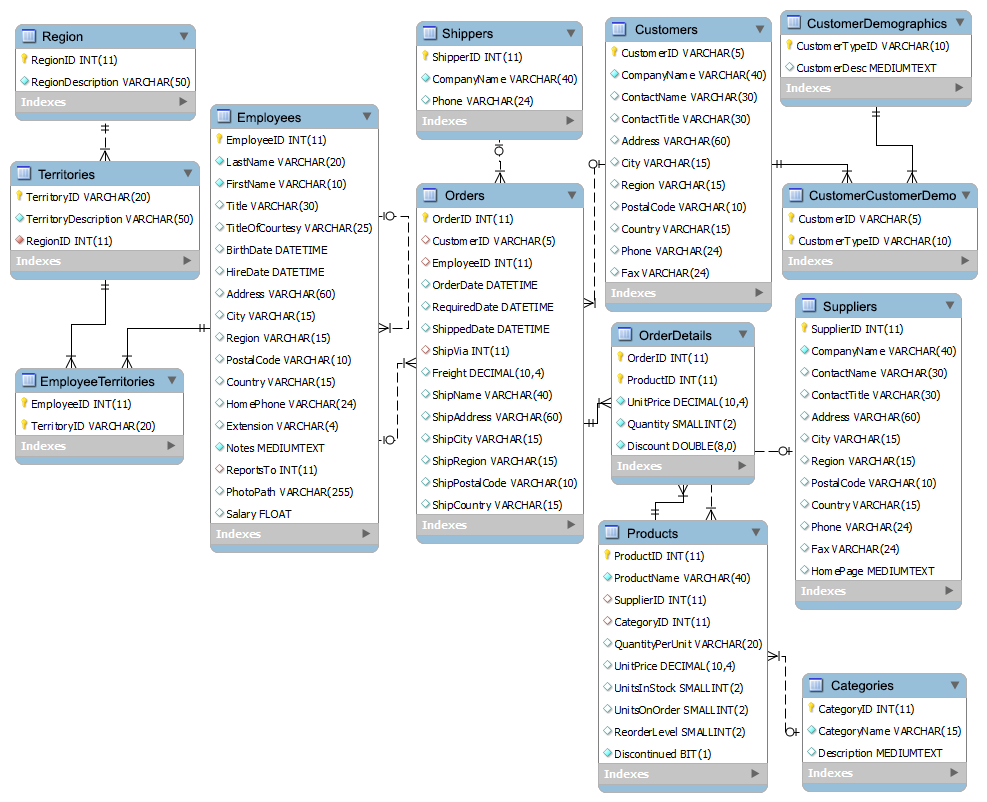

# **SQL**
1. Dapatkah membuat data TotalPrice per OrderID untuk dijadikan sebagai data pelengkap analisis?
2. Apakah tabel customers, orders, ordersdetail, dan shippers dapat digabungkan menjadi 1 tabel? Jika memungkinkan, tampilkan tabel yang memuat informasi transaksi yang melibatkan keempat tabel tersebut.

# **DATABASE**

## **Connecting To Database**

Bagian ini merupakan langkah awal untuk mulai melakukan proses analisis data. Pertama adalah membuat koneksi ke database di mana seperti yang sudah dijelaskan sebelumnya, database yang akan digunakan adalah database ``northwind``. Dengan melakukan koneksi ini, kita dapat mengakses seluruh tabel yang ada pada database.


In [1]:
# Import Modules

import pandas as pd
import numpy as np
import mysql.connector as sqlcon

In [2]:
# Connect To Database

mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = 'nokia5530',
    database = 'northwind'
)

Selain melakukan koneksi ke database, hal lain yang perlu dilakukan pada bagian awal ini adalah membuat sebuah fungsi untuk menuliskan ``query`` yang kemudian akan disimpan dalam bentuk DataFrame. Tujuannya adalah agar data hasil ``query`` yang dibuat dapat disimpan dan digunakan untuk keperluan analisis data. Nantinya, di sini terdapat 3 query untuk mengambil data-data yang ada di database, bukan hanya berasal dari 1 tabel, tapi juga akan melibatkan hubungan antar tabel.

In [3]:
# Query Function

curs = mydb.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel1 = pd.DataFrame(result, columns=curs.column_names)
    return tabel1

## **Data Explanation Detail**

Data pertama ini merupakan data utama yang nantinya akan dianalisa lebih lanjut. Data ini merupakan gabungan dari 4 tabel, yaitu tabel ```orders```, ```orderdetails```, ```shippers``` dan ```customers```. Masing-masing dari setiap tabel tersebut diambil beberapa kolomnya dan tidak diambil secara keseluruhan. Informasi-informasi yang dianggap penting saja lah yang diambil. Informasi yang diambil antara lain adalah :
- OrderID dari table orders
- CustomerID dari table orders
- EmployeeID dari table orders
- OrderDate dari table orders
- RequiredDate dari table orders
- ShippedDate dari table orders 
- Freight dari table orders 
- ShipAddress dari table orders
- ShipCity dari table orders
- ShipRegion dari table orders 
- ShipPostalCode dari table orders
- ShipCountry dari table orders
- CompanyShipName dari table shippers
- UnitPrice dari table orderdetails
- Quantity dari table orderdetails
- CompanyCustomerName dari table customers

Semua informasi tersebut kemudian dijadikan dalam sebuah DataFrame yang nantinya akan diolah informasinya.

## **Pengolahan Data Total Price**

Table ```total_price_ship``` merupakan olahan data dari table ```orderdetails```. Dalam table ```total_price_ship``` berisikan informasi OrderID dan TotalPrice. TotalPrice merupakan total biaya belanja dalam satu transaksi per OrderID. Rumus dari TotalPrice yaitu penjumlahan atau total keseluruhan perkalian antara UnitPrice dan Quantity yang di kelompokan berdasarkan OrderID. 


In [4]:
# Query 1 (Create total_price_ship Table)

sql_table (
    '''
create table total_price_ship as
select OrderID, sum(UnitPrice * Quantity) As TotalPrice from orderdetails
group by OrderID;

   '''
)

""


In [5]:
# Query 2 (View total_price_ship Table)

table1 = sql_table (
    '''
select * from total_price_ship
   '''
)

table1.head(10)

,OrderID,TotalPrice
0,10248,440.0000
1,10249,1863.4000
2,10250,1813.0000
3,10251,670.8000
4,10252,3730.0000
5,10253,1444.8000
6,10254,625.2000
7,10255,2490.5000
8,10256,517.8000
9,10257,1119.9000


## **Join Data Orders, Shippers, Customers dan Total Price**

Penggabungan table ```orders```, ```shippers```, ```customers``` dan ```total_price_ship``` memberikan informasi yang lengkap terkait pesanan. Penggabungan table ini dilakukan left join dengan table fokus utamanya yaitu ```orders``` sehingga tidak ada baris pada kolom table ```orders``` yang missing value pada saat penggabungan table.

In [6]:
# Query 3 (Aggregating table using left join)

table2 = sql_table(
    '''
select o.OrderID, c.CompanyName as CompanyCustomerName, o.EmployeeID, o.OrderDate, o.RequiredDate, o.ShippedDate, 
       s.CompanyName as CompanyShipName, o.Freight, t.TotalPrice, o.ShipAddress, o.ShipCity, o.ShipRegion, o.ShipPostalCode, 
       o.ShipCountry  
from orders o
left join total_price_ship t on o.OrderID = t.OrderID
left join customers c on c.CustomerID = o.CustomerID
left join shippers s on s.ShipperID = o.ShipVia;
    '''
)

table2.head(100)

,OrderID,CompanyCustomerName,EmployeeID,OrderDate,RequiredDate,ShippedDate,CompanyShipName,Freight,TotalPrice,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,Vins et alcools Chevalier,5,1996-07-04,1996-08-01,1996-07-16,Federal Shipping,32.3800,440.0000,59 rue de l-Abbaye,Reims,None,51100,France
1,10249,Toms Spezialitten,6,1996-07-05,1996-08-16,1996-07-10,Speedy Express,11.6100,1863.4000,Luisenstr. 48,Mnster,None,44087,Germany
2,10250,Hanari Carnes,4,1996-07-08,1996-08-05,1996-07-12,United Package,65.8300,1813.0000,"Rua do Pao, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,Victuailles en stock,3,1996-07-08,1996-08-05,1996-07-15,Speedy Express,41.3400,670.8000,"2, rue du Commerce",Lyon,None,69004,France
4,10252,Suprmes dlices,4,1996-07-09,1996-08-06,1996-07-11,United Package,51.3000,3730.0000,"Boulevard Tirou, 255",Charleroi,None,B-6000,Belgium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10343,Lehmanns Marktstand,4,1996-10-31,1996-11-28,1996-11-06,Speedy Express,110.3700,1586.0000,Magazinweg 7,Frankfurt a.M.,None,60528,Germany
96,10344,White Clover Markets,4,1996-11-01,1996-11-29,1996-11-05,United Package,23.2900,2856.0000,1029 - 12th Ave. S.,Seattle,WA,98124,USA
97,10345,QUICK-Stop,2,1996-11-04,1996-12-02,1996-11-11,United Package,249.0600,2924.8000,Taucherstrae 10,Cunewalde,None,1307,Germany
98,10346,Rattlesnake Canyon Grocery,3,1996-11-05,1996-12-17,1996-11-08,Federal Shipping,142.0800,1731.2000,2817 Milton Dr.,Albuquerque,NM,87110,USA


# **Data Manipulation**
1. Apakah terdapat anomaly berupa missing values, data duplicate, kesalahan data formating atau tipe data, dan/atau inconsistency typing? Jika ada tunjukan serta lakukan penanganan pada anomaly tersebut!
2. Apakah terdapat tipe data yang berupa datetime pada data? Apakah tipe data yang berupa datetime tersebut dapat dicari tahu selisihnya? Silahkan tampilkan hasilnya, berikan insight yang sesuai!
3. Ada berapa jumlah TotalPrice pada setiap perusahaan kargo/kurir? Bagaimana nilai-nilai statistik deskripsinya dari jumlah TotalPrice pada setiap perusahaan kargo/kurir tersebut? Jabarkan dan berikan insight!
4. Apakah terdapat data outlier pada data TotalPrice dan Freight? Jelaskan melalui tabular dan boxplot!

# **DATA MANIPULATION**

Seperti yang telah dijelaskan sebelumnya, data yang digunakan untuk dianalisis adalah data pada ```table2```. Sebelum melakukan analisis lebih lanjut, hal yang harus dilakukan adalah mengecek informasi serta anomali pada data. Jika memang terdapat hal-hal yang dianggap 'kotor' pada data, maka yang perlu dilakukan adalah melakukan penanganan pada bagian tersebut. Pada bagian ini, data akan dibersihkan, sehingga output akhir yang diharapkan adalah terdapat sebuah tabel yang bersih yang dapat dianalisis lebih lanjut dengan menampilkan visualisasi dan nilai statistiknya.

## **Data Anomalies**

## **Review Data General Info**

In [7]:
# Check Info Tabel2

table2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   OrderID              830 non-null    int64         
 1   CompanyCustomerName  830 non-null    object        
 2   EmployeeID           830 non-null    int64         
 3   OrderDate            830 non-null    datetime64[ns]
 4   RequiredDate         830 non-null    datetime64[ns]
 5   ShippedDate          809 non-null    datetime64[ns]
 6   CompanyShipName      830 non-null    object        
 7   Freight              830 non-null    object        
 8   TotalPrice           830 non-null    object        
 9   ShipAddress          830 non-null    object        
 10  ShipCity             830 non-null    object        
 11  ShipRegion           323 non-null    object        
 12  ShipPostalCode       811 non-null    object        
 13  ShipCountry          830 non-null  

Hasil pada bagian atas ditampilkan adalah general info. Terlihat bahwa secara keseluruhan terdapat 830 baris data dengan total 14 kolom. Setiap kolomnya memiliki tipe data yang berbeda-beda yaitu object (9 kolom), integer (2 kolom), dan datetime (3 kolom). Terdapat 2 masalah yang dapat diamati melalui data general info yaitu tipe data yang tidak sesuai dan terdapat missing value pada beberapa kolom. 

Berikut kolom yang menjadi perhatian untuk dilakukan penanganan missing value: 
1. ShippedDate 
2. ShipRegion
3. ShipPostalCode

Jika melihat informasi tersebut, tidak semua kolom yang memiliki data lengkap. Kolom yang memiliki kehilangan data yang paling banyak yaitu kolom ```ShipRegion```. Kolom tersebut kehilangan lebih dari 60% data. Selain dari itu, terdapat beberapa kolom lainnya yang datanya juga missing seperti ```ShippedDate``` dan ```ShipPostalCode```. Kesimpulan pertama adalah bahwa terdapat *missing value* yang harus ditanggulangi.

Berikut kolom yang menjadi perhatian untuk dilakukan perbaikan konversi tipe data: 
1. Freight 
2. TotalPrice

Terdapat 2 kolom pada table2 yang memiliki tipe data yang tidak sesuai. Kedua kolom tersebut yaitu ```Freight``` dan ```TotalPrice```. Kedua kolom tersebut memiliki tipe data eksisting yaitu object. Kolom ```Freight``` dan ```TotalPrice``` seharusnya memiliki tipe data float. Tipe data float ini satuan nilai yang memiliki angka koma dibelakang angka intergernya sehingga cocok untuk kolom ```Freight``` dan ```TotalPrice```. Kesimpulan keduanya adalah terdapat kolom yang memiliki tipe data yang salah dan harus diubah sesuai dengan tipe data seharusnya.

## **Missing Values**

In [8]:
# Check Missing Value Percentage

table2.isnull().sum()

OrderID                  0
CompanyCustomerName      0
EmployeeID               0
OrderDate                0
RequiredDate             0
ShippedDate             21
CompanyShipName          0
Freight                  0
TotalPrice               0
ShipAddress              0
ShipCity                 0
ShipRegion             507
ShipPostalCode          19
ShipCountry              0
dtype: int64

Terdapat beberapa kolom yang memiliki missing values. Kolom ```ShipRegion``` memiliki jumlah missing values sebanyak 507 baris atau lebih dari 60% total baris keseluruhan. Hal ini bisa dihipotesiskan, jika missing valuenya dihilangkan dengan melihat row atau barisnya, setengah dari data yang dimiliki akan hilang, yang berarti akan mengakibatkan hilangnya banyak informasi. Solusi dari hal tersebut, maka kolom tersebut akan dihapus dan tidak akan dimasukkan ke dalam data yang akan dianalisis.

Kolom ```ShippedDate``` dan ```ShipPostalCode``` masing-masing memiliki missing values sebanyak 21 dan 19. Kasus pada kedua kolom tersebut setelah diamati secara keseluruhan datanya bahwa data yang hilang tersebut adalah bagian dari baris yang berbeda. Hal tersebut dibutuhkan penanganan missing values yang berbeda. Penanganan missing values ini harus disesuaikan oleh keadaan baris data yang hilang apakah dapat diisi secara manual atau tidak dengan informasi yang kita dapatkan. 

Baris yang missing values pada kolom ```ShippedDate``` tidak dapat isi/perbaharui datanya karena kita tidak tahu data yang kita akan isi pada baris tersebut. Cara untuk mengatasi baris missing values pada kolom kolom ```ShippedDate``` cukup dengan melakukan drop data. Sedangkan kolom ```ShipPostalCode``` yang baris datanya missing values ini memiliki beberapa petunjuk yang dapat kita isi/perbaharui data missing valuesnya. Informasi petunjuk tersebut seperti kolom ```ShipAddress```, ```ShipCity```, ```ShipRegion```,  dan ```ShipCountry```.

## **Handling Anomalies**

Setelah mengetahui hal-hal yang harus 'dibereskan' terlebih dahulu, maka pada bagian ini, hal-hal tersebut harus diatasi. Pertama, masalah missing value. Sebenarnya pada bagian sebelumnya sudah diberi tahu apa saja yang harus dilakukan untuk mengatasi masalah tersebut. Bagian pertama jelas akan dilakukan fillna kolom ```ShipPostalCode```. Bagian kedua dilakukan drop kolom ```ShipRegion```. Bagian terakhir dilakukan dropna missing value dari kolom ```ShippedDate``` sehingga hanya terhapus sebagian kecil baris yang missing values pada kolom ini.

In [9]:
# Review Before Fillna Missing Values of ShipPostalCode Column 

table2[table2['ShipRegion'] == 'Co. Cork'][['ShipAddress', 'ShipCity', 'ShipRegion', 'ShipCountry', 'ShipPostalCode']]

,ShipAddress,ShipCity,ShipRegion,ShipCountry,ShipPostalCode
50,8 Johnstown Road,Cork,Co. Cork,Ireland,None
61,8 Johnstown Road,Cork,Co. Cork,Ireland,None
87,8 Johnstown Road,Cork,Co. Cork,Ireland,None
125,8 Johnstown Road,Cork,Co. Cork,Ireland,None
132,8 Johnstown Road,Cork,Co. Cork,Ireland,None
181,8 Johnstown Road,Cork,Co. Cork,Ireland,None
255,8 Johnstown Road,Cork,Co. Cork,Ireland,None
268,8 Johnstown Road,Cork,Co. Cork,Ireland,None
319,8 Johnstown Road,Cork,Co. Cork,Ireland,None
398,8 Johnstown Road,Cork,Co. Cork,Ireland,None


In [10]:
# Update Fillna Missing Value of ShipPostalCode

mask = (table2['ShipAddress'] == '8 Johnstown Road') & (table2['ShipCity'] == 'Cork') & (table2['ShipRegion'] == 'Co. Cork') & (table2['ShipCountry'] == 'Ireland')
table2.loc[mask, 'ShipPostalCode'] = table2.loc[mask, 'ShipPostalCode'].fillna('T45 HE16')

In [11]:
# Review After Fillna Missing Values of ShipPostalCode Column

table2[table2['ShipRegion'] == 'Co. Cork'][['ShipAddress', 'ShipCity', 'ShipRegion', 'ShipCountry', 'ShipPostalCode']]

,ShipAddress,ShipCity,ShipRegion,ShipCountry,ShipPostalCode
50,8 Johnstown Road,Cork,Co. Cork,Ireland,T45 HE16
61,8 Johnstown Road,Cork,Co. Cork,Ireland,T45 HE16
87,8 Johnstown Road,Cork,Co. Cork,Ireland,T45 HE16
125,8 Johnstown Road,Cork,Co. Cork,Ireland,T45 HE16
132,8 Johnstown Road,Cork,Co. Cork,Ireland,T45 HE16
181,8 Johnstown Road,Cork,Co. Cork,Ireland,T45 HE16
255,8 Johnstown Road,Cork,Co. Cork,Ireland,T45 HE16
268,8 Johnstown Road,Cork,Co. Cork,Ireland,T45 HE16
319,8 Johnstown Road,Cork,Co. Cork,Ireland,T45 HE16
398,8 Johnstown Road,Cork,Co. Cork,Ireland,T45 HE16


In [12]:
# Remove Column ShipRegion

table2.drop(['ShipRegion'], axis=1, inplace = True)

In [13]:
# Remove Missing Value ShippedDate Rows

table2.dropna(inplace = True)

## **Recheck Missing Value Information**

In [14]:
# Recheck Info

table2.isnull().sum()

OrderID                0
CompanyCustomerName    0
EmployeeID             0
OrderDate              0
RequiredDate           0
ShippedDate            0
CompanyShipName        0
Freight                0
TotalPrice             0
ShipAddress            0
ShipCity               0
ShipPostalCode         0
ShipCountry            0
dtype: int64

Seluruh baris pada setiap kolom sudah tidak terdapat missing values setelah dilakukan penanganan missing value dengan proses *fillna*, *drop*, dan *dropna*. Total kolom dan baris pada table2 ini masing-masing yaitu sebanyak 13 kolom dan 809 baris. Kolom ```ShipPostalCode``` sudah tidak memiliki missing values karena dilakukan proses *fillna*. Proses *fillna* pada kolom ```ShipPostalCode``` diseleksi berdasarkan ```ShipAddress``` = '8 Johnstown Road', ```ShipCity``` = 'Cork', ```ShipRegion``` = 'Co. Cork', dan ```ShipCountry``` = 'Ireland'. Jumlah kolom berkurang 1 kolom yaitu kolom ```ShipRegion``` dengan proses *drop*. Jumlah baris berkurang 21 baris akibat kolom ```ShippedDate``` terdapat missing values dengan proses *dropna*. Berdasarkan output recheck info tabel2 di atas jumlah missing value berjumlah 0 dan kolom ```ShipRegion``` sudah terhapus dari table2. Permasalahan missing values pada table2 sudah teratasi.

## **Conversion Data Type**

Berdasarkan informasi sebelumnya bahwa ada tipe data yang tidak sesuai. Kedua kolom tersebut terlebih dahulu dikonversi agar fungsionalitasnya kembali ke hakekatnya. Numerik akan diperlakukan sebagai tipe data numerik. Tujuannya tentu saja agar kolom tersebut dapat dipergunakan sebagaimana mestinya.

In [15]:
# Change Spesific Column To Date Time Format

table2['Freight'] = pd.to_numeric(table2['Freight'])
table2['TotalPrice'] = pd.to_numeric(table2['TotalPrice'])

## **Recheck Data Type Information**

In [16]:
# Recheck Info

table2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 809 entries, 0 to 821
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   OrderID              809 non-null    int64         
 1   CompanyCustomerName  809 non-null    object        
 2   EmployeeID           809 non-null    int64         
 3   OrderDate            809 non-null    datetime64[ns]
 4   RequiredDate         809 non-null    datetime64[ns]
 5   ShippedDate          809 non-null    datetime64[ns]
 6   CompanyShipName      809 non-null    object        
 7   Freight              809 non-null    float64       
 8   TotalPrice           809 non-null    float64       
 9   ShipAddress          809 non-null    object        
 10  ShipCity             809 non-null    object        
 11  ShipPostalCode       809 non-null    object        
 12  ShipCountry          809 non-null    object        
dtypes: datetime64[ns](3), float64(2), i

Pada data table2 eksisting sebelum dilakukan konversi tipe data, 2 kolom yang memiliki tipe data yang salah sudah dikonversi ke dalam tipe data yang seharusnya. Untuk memastikannya, output di atas merupakan informasi umum yang kembali diperlihatkan untuk memastikan tipe data yang sudah dikonversi tersebut. 2 kolom yang awalnya bertipe data object seharusnya bertipe data numeric yaitu ```Freight``` dan ```TotalPrice``` sudah menjadi tipe data float64. Hal ini perubahan yang dilakukan sebelumnya sudah terimplementasi dan anomali yang kedua sudah teratasi. 

## **Data Duplicate**

In [17]:
# Check Duplicate

table2[table2.duplicated()]

,OrderID,CompanyCustomerName,EmployeeID,OrderDate,RequiredDate,ShippedDate,CompanyShipName,Freight,TotalPrice,ShipAddress,ShipCity,ShipPostalCode,ShipCountry


Anomali berikutnya yang bisa ditemui adalah data yang duplikat. Tentu saja data yang bersifat duplikat ini akan menjadi sesuatu hal yang akan mengganggu proses analisis data. Jika memang nantinya terdapat data yang duplikat, sebaiknya data duplikatnya dihapus dan disisakan data yang unique saja. Untuk data table2, melihat output di atas artinya tidak terdapat data yang duplikat. Dengan begitu tidak perlu ada proses yang dilakukan.

## **Feature 'ProcessingDate' and 'PunctualityDate'**

Data awal menunjukan terdapat 2 kolom yang merupakan tipe data datetime. Artinya, kita dapat melakukan ekstraksi informasi tambahan dari kedua kolom tersebut. Sebelumnya, kita perlu tahu dulu definisi dari kedua tabel tersebut. RequiredDate secara singkat dapat diartikan sebagai waktu atau kapan barang tersebut dibutuhkan oleh pelanggan untuk sampai tempat tujuan, sedangkan ShippedDate adalah waktu sampainya barang tersebut di tempat tujuan oleh kargo. 

Jika dianalisis kedua definisi tersebut maka sebuah informasi dapat diekstrak. Informasi tersebut yaitu seberapa lama waktu proses barangnya dari waktu pengiriman hingga sampai di tempat tujuan (```ProcessingDate```) dan ketepatan waktu antara waktu barang sampai yang dibutuhkan oleh pelanggan dan waktu barang sampai di tujuan secara aktual (```PunctualityDate```). ```ProcessingDate``` memiliki rumus yaitu pengurangan antara ```RequiredDate``` dan ```ShippedDate```. ```PunctualityDate``` memiliki rumus pengurangan antara ```RequiredDate``` dan ```ShippedDate```. Output yang keluar nantinya akan berupa selisih atau lamanya waktu proses tersebut dalam satuan hari.

In [18]:
# Add New Column (Processing Day and Punctuality Day)

table2['ProcessingDate'] = table2['ShippedDate'] - table2['OrderDate']
table2['PunctualityDate'] = table2['RequiredDate'] - table2['ShippedDate']
table2.sample(200)

,OrderID,CompanyCustomerName,EmployeeID,OrderDate,RequiredDate,ShippedDate,CompanyShipName,Freight,TotalPrice,ShipAddress,ShipCity,ShipPostalCode,ShipCountry,ProcessingDate,PunctualityDate
234,10482,Lazy K Kountry Store,1,1997-03-21,1997-04-18,1997-04-10,Federal Shipping,7.48,147.00,12 Orchestra Terrace,Walla Walla,99362,USA,20 days,8 days
752,11000,Rattlesnake Canyon Grocery,2,1998-04-06,1998-05-04,1998-04-14,Federal Shipping,55.12,1075.00,2817 Milton Dr.,Albuquerque,87110,USA,8 days,20 days
731,10979,Ernst Handel,8,1998-03-26,1998-04-23,1998-03-31,United Package,353.07,4813.50,Kirchgasse 6,Graz,8010,Austria,5 days,23 days
86,10334,Victuailles en stock,8,1996-10-21,1996-11-18,1996-10-28,United Package,8.56,144.80,"2, rue du Commerce",Lyon,69004,France,7 days,21 days
722,10970,Blido Comidas preparadas,9,1998-03-24,1998-04-07,1998-04-24,Speedy Express,16.16,280.00,"C/ Araquil, 67",Madrid,28023,Spain,31 days,-17 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,10702,Alfreds Futterkiste,4,1997-10-13,1997-11-24,1997-10-21,Speedy Express,23.94,330.00,Obere Str. 57,Berlin,12209,Germany,8 days,34 days
153,10401,Rattlesnake Canyon Grocery,1,1997-01-01,1997-01-29,1997-01-10,Speedy Express,12.51,3868.60,2817 Milton Dr.,Albuquerque,87110,USA,9 days,19 days
548,10796,HILARION-Abastos,3,1997-12-25,1998-01-22,1998-01-14,Speedy Express,26.52,2878.08,Carrera 22 con Ave. Carlos Soublette #8-35,San Cristbal,5022,Venezuela,20 days,8 days
80,10328,Furia Bacalhau e Frutos do Mar,4,1996-10-14,1996-11-11,1996-10-17,Federal Shipping,87.03,1168.00,Jardim das rosas n. 32,Lisboa,1675,Portugal,3 days,25 days


## **Unique Value 'ProcessingDate' and 'PunctualityDate'**

Proses pembuatan sebuah 2 kolom baru yang bernama ProcessingDate dan PunctualityDate sebagaimana yang sudah didefinisikan sebelumnya, dapat dicek bagaimana data tersebut. Jika melihat dari preview output sebelumnya, tidak ada kesalahan. Berikut ini penampakan hasil yang memperlihatkan unique values beserta jumlah data di setiap unique values-nya.

## **Check PunctualityDate and ProcessingDate Anomaly**

In [19]:
# Check Data Anomalies in Date Time Format

table2['ProcessingDate'].value_counts()

7 days     108
6 days      91
8 days      71
9 days      70
3 days      70
5 days      65
4 days      63
2 days      58
10 days     53
12 days     19
1 days      18
11 days     14
21 days      9
29 days      8
13 days      7
19 days      7
32 days      7
14 days      6
15 days      6
20 days      6
18 days      5
23 days      5
25 days      5
17 days      5
35 days      5
34 days      4
22 days      4
30 days      4
24 days      3
26 days      3
28 days      3
27 days      2
31 days      2
37 days      2
16 days      1
Name: ProcessingDate, dtype: int64

In [20]:
# Check Data Anomalies in Date Time Format

table2['PunctualityDate'].value_counts()

21 days     93
22 days     72
25 days     60
23 days     60
19 days     59
24 days     57
20 days     57
26 days     56
18 days     41
16 days     17
7 days      16
27 days     15
17 days     14
8 days      13
5 days      12
10 days     12
36 days     11
-1 days      9
11 days      9
34 days      9
4 days       9
6 days       8
35 days      7
13 days      7
9 days       7
32 days      6
-7 days      6
39 days      6
15 days      6
-6 days      5
14 days      5
37 days      4
3 days       4
0 days       3
1 days       3
-2 days      3
-4 days      3
12 days      3
33 days      3
2 days       3
-18 days     2
-9 days      2
30 days      2
-3 days      1
28 days      1
38 days      1
-23 days     1
-16 days     1
-11 days     1
-8 days      1
41 days      1
-5 days      1
-17 days     1
Name: PunctualityDate, dtype: int64

Melihat output unique values beserta dengan banyaknya data di setiap unique values tersebut terdapat sebuah waktu yang menunjukan nilai minus seperti -1 days, -2 days, -3 days, -4 days, dan -5 days serta nilai minus lainnya. Terdapat ada 2 asumsi yang bisa diambil. Asumsi pertama adalah murni kesalahan input saat memasukan ke dalam database, atau asumsi yang kedua adalah pengirimannya mengalami keterlambatan. Namun pada analisis ini, asumsi yang akan digunakan adalah asumsi yang kedua yaitu terdapat keterlambatan dalam pengiriman karena di awal sudah didefinisikan sebagai ketepatan waktu. 

## **Handling PunctualityDate Data**

Dalam mengatasi keambiguan informasi maka kita membuat kolom baru yang berisikan informasi terkait status pengiriman dengan nama kolom ```ShipStatus```. ```ShipStatus``` memiliki rumus jika dibawah -1 days maka dianggap telat (Late) dan sebaliknya adalah tepat waktu (On Time). 

In [21]:
# Create reference column with conversion data type timedelta[ns] to timedelta[D] formula 
table2['PunctualityDateNum'] = table2['PunctualityDate'].astype('timedelta64[D]')

# Create new column with conditional statement formula
table2['ShipStatus'] = table2['PunctualityDateNum'].apply(lambda x: 'Late' if x <= -1 else 'On Time')

# Drop reference column
table2.drop(['PunctualityDateNum'], axis=1, inplace = True)

## **Preview Cleaned Data**

Setelah semua anomalies sudah diselesaikan, artinya data yang dimiliki sudah bersih. Di bawah ini adalah sample data yang dianggap sudah bersih setelah melewati proses-proses sebelumnya.

In [22]:
# Clean Data

table2.sample(10)

,OrderID,CompanyCustomerName,EmployeeID,OrderDate,RequiredDate,ShippedDate,CompanyShipName,Freight,TotalPrice,ShipAddress,ShipCity,ShipPostalCode,ShipCountry,ProcessingDate,PunctualityDate,ShipStatus
696,10944,Bottom-Dollar Markets,6,1998-03-12,1998-03-26,1998-03-13,Federal Shipping,52.92,1139.1,23 Tsawassen Blvd.,Tsawassen,T2F 8M4,Canada,1 days,13 days,On Time
659,10907,Spcialits du monde,6,1998-02-25,1998-03-25,1998-02-27,Federal Shipping,9.19,108.5,"25, rue Lauriston",Paris,75016,France,2 days,26 days,On Time
305,10553,Wartian Herkku,2,1997-05-30,1997-06-27,1997-06-03,United Package,149.49,1546.3,Torikatu 38,Oulu,90110,Finland,4 days,24 days,On Time
704,10952,Alfreds Futterkiste,1,1998-03-16,1998-04-27,1998-03-24,Speedy Express,40.42,491.2,Obere Str. 57,Berlin,12209,Germany,8 days,34 days,On Time
39,10287,Ricardo Adocicados,8,1996-08-22,1996-09-19,1996-08-28,Federal Shipping,12.76,924.0,"Av. Copacabana, 267",Rio de Janeiro,02389-890,Brazil,6 days,22 days,On Time
717,10965,Old World Delicatessen,6,1998-03-20,1998-04-17,1998-03-30,Federal Shipping,144.38,848.0,2743 Bering St.,Anchorage,99508,USA,10 days,18 days,On Time
439,10687,Hungry Owl All-Night Grocers,9,1997-09-30,1997-10-28,1997-10-30,United Package,296.43,6201.9,8 Johnstown Road,Cork,T45 HE16,Ireland,30 days,-2 days,Late
679,10927,La corne d'abondance,4,1998-03-05,1998-04-02,1998-04-08,Speedy Express,19.79,800.0,"67, avenue de l-Europe",Versailles,78000,France,34 days,-6 days,Late
437,10685,Gourmet Lanchonetes,4,1997-09-29,1997-10-13,1997-10-03,United Package,33.75,801.1,"Av. Brasil, 442",Campinas,04876-786,Brazil,4 days,10 days,On Time
808,11056,Eastern Connection,8,1998-04-28,1998-05-12,1998-05-01,United Package,278.96,3740.0,35 King George,London,WX3 6FW,UK,3 days,11 days,On Time


## **General Info Cleaned Data**

In [23]:
# Check General Info Data

listItem = []
for col in table2.columns :
    listItem.append([col, table2[col].dtype, len(table2),table2[col].isna().sum(), round((table2[col].isna().sum()/len(table2[col])) * 100,2),
                    table2[col].nunique(), list(table2[col].drop_duplicates().sample(2).values)])

table2Desc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
table2Desc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,OrderID,int64,809,0,0.0,809,"[10456, 10597]"
1,CompanyCustomerName,object,809,0,0.0,89,"[Ernst Handel, Godos Cocina Tpica]"
2,EmployeeID,int64,809,0,0.0,9,"[9, 4]"
3,OrderDate,datetime64[ns],809,0,0.0,478,"[1997-09-30T00:00:00.000000000, 1998-03-20T00:..."
4,RequiredDate,datetime64[ns],809,0,0.0,450,"[1996-09-25T00:00:00.000000000, 1996-10-17T00:..."
5,ShippedDate,datetime64[ns],809,0,0.0,387,"[1997-04-04T00:00:00.000000000, 1997-04-24T00:..."
6,CompanyShipName,object,809,0,0.0,3,"[Federal Shipping, United Package]"
7,Freight,float64,809,0,0.0,779,"[70.29, 29.76]"
8,TotalPrice,float64,809,0,0.0,764,"[1820.2, 706.0]"
9,ShipAddress,object,809,0,0.0,89,"[Fauntleroy Circus, Starenweg 5]"


Berdasarkan output General Info Cleaned Data, jumlah baris setiap kolom sudah sama yaitu 809 baris. Seluruh kolom sudah memiliki tipe data yang sesuai dengan hakikat dan tujuannya. Seluruh kolom juga tidak memiliki baris yang mengalami missing values. Hal tersebut dapat disimpulkan bahwa data table2 sudah tidak memiliki permasalahan serius dan dapat digunakan untuk analisis tingkat lanjut.

## **Data Outlier**

In [24]:
# Freight Outlier Check With Function

Q1_amount = table2['Freight'].describe()['25%']
Q3_amount = table2['Freight'].describe()['75%']
iqr = Q3_amount - Q1_amount

outlier_index = table2[(table2['Freight'] < Q1_amount - (1.5 * iqr)) | (table2['Freight']> Q3_amount + (1.5 * iqr))].index
not_outlier_index = table2[(table2['Freight'] > Q1_amount - (1.5 * iqr)) & (table2['Freight']< Q3_amount + (1.5 * iqr))].index
print('Total of Freight Outlier:',table2.loc[outlier_index][['Freight']].count())

Total of Freight Outlier: Freight    62
dtype: int64


In [25]:
# TotalPrice Outlier Check With Function

Q1_amount = table2['TotalPrice'].describe()['25%']
Q3_amount = table2['TotalPrice'].describe()['75%']
iqr = Q3_amount - Q1_amount

outlier_index = table2[(table2['TotalPrice'] < Q1_amount - (1.5 * iqr)) | (table2['TotalPrice']> Q3_amount + (1.5 * iqr))].index
not_outlier_index = table2[(table2['TotalPrice'] > Q1_amount - (1.5 * iqr)) & (table2['TotalPrice']< Q3_amount + (1.5 * iqr))].index
print('Total of Freight TotalPrice:',table2.loc[outlier_index][['TotalPrice']].count())

Total of Freight TotalPrice: TotalPrice    54
dtype: int64


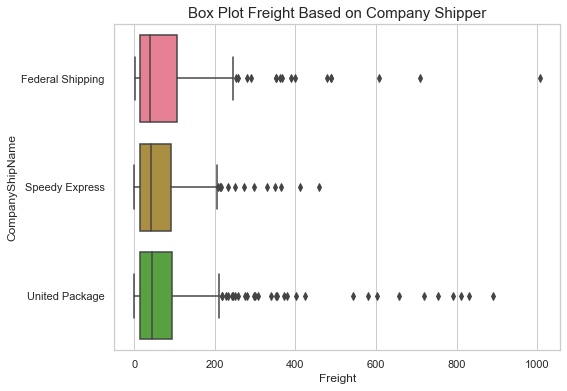

In [27]:
# Boxplot Freight Based on CompanyShipName

sns.set_theme(style = "whitegrid", palette = "husl")
plt.figure(figsize=(8,6))
sns.boxplot(x = table2['Freight'], y=table2['CompanyShipName'])
plt.title('Box Plot Freight Based on Company Shipper', size = 15)
plt.show()

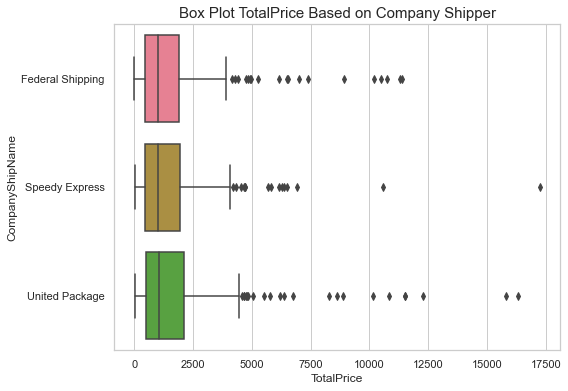

In [28]:
# Boxplot TotalPrice Based on CompanyShipName

sns.set_theme(style = "whitegrid", palette = "husl")
plt.figure(figsize=(8,6))
sns.boxplot(x = table2['TotalPrice'], y=table2['CompanyShipName'])
plt.title('Box Plot TotalPrice Based on Company Shipper', size = 15)
plt.show()

Berdasarkan analisis outlier pada data ```Freight``` atau data biaya kirim/ongkos yang perlu dibayar oleh pelanggan untuk mengirimkan barangnya, terdapat 62 data yang dianggap sebagai outlier. Sedangkan outlier pada data ```TotalPrice``` atau data jumlah harga barang yang dibeli per OrderID, terdapat 54 data yang dianggap sebagai outlier. Outlier pada data ini tidak dilakukan penghapusan data karena data ini merupakan data yang didapatkan dari transaksi pengiriman barang secara langsung dan bukan karena kesalahan dalam pengukuran.

## **Total Price Based On Company Shipper Name**

In [29]:
# Groupping and Aggregating

table2[['TotalPrice','CompanyShipName']].groupby('CompanyShipName').describe()

TotalPrice                                                 \
                      count         mean          std   min    25%     50%   
CompanyShipName                                                              
Federal Shipping      249.0  1611.077590  1939.271996  12.5  452.9   996.0   
Speedy Express        245.0  1514.457673  1758.600611  18.4  479.8  1030.0   
United Package        315.0  1761.315492  2216.195022  30.0  524.7  1064.0   

                                    
                      75%      max  
CompanyShipName                     
Federal Shipping  1928.00  11380.0  
Speedy Express    1936.00  17250.0  
United Package    2133.05  16321.9

Tabel agregat ini menggunakan 2 kolom yaitu kolom TotalPrice dan CompanyShipName. Kolom TotalPrice yaitu total biaya belanja pada transaksi tersebut. Sedangkan kolom CompanyShipName ini merupakan daftar nama perusahaan kargo/kurir dari transaksi yang ada pada basisdata. Daftar nama perusahaan kargo/kurir terdiri dari 3 perusahaan yaitu Federal Shipping, Speedy Express, dan United Package. Ketiga perusahaan kargo/kurir ini memiliki jumlah pengiriman dan jumlah biaya belanja tiap transaksi.

United Package merupakan perusahaan kargo/kurir dengan jumlah pengiriman barang terbanyak pada data ini jika dibandingkan dengan 2 perusahaan lainnya. Total terdapat 315 pengiriman per transaksi. Jika dianalisis melalui TotalPrice, rata-rata total biaya belanja pada transaksi yang dikirim tersebut, yakni sebesar 1761.31 US Dollar. Nilai TotalPrice tersebut merupakan yang terbesar di antara 2 perusahaan lainnya. Barang-barang yang sudah dikirim melalui United Package ini memiliki rataan nilai beli yang sangat besar. TotalPrice per transaksi terendah dan terbesar pada pengiriman melalui United Package masing-masing yaitu 30 US Dollar dan 16321.9 US Dollar.

Federal Shipping merupakan perusahaan kargo/kurir dengan jumlah pengiriman barang kedua terbanyak pada data ini. Total terdapat 249 pengiriman per transaksi. Jika dianalisis melalui TotalPrice, rata-rata total biaya belanja pada transaksi yang dikirim tersebut, yakni sebesar 1611.07 US Dollar. Barang-barang yang sudah dikirim melalui United Package ini memiliki rataan nilai beli yang tidak terlalu besar. TotalPrice per transaksi terendah dan terbesar pada pengiriman melalui Federal Shipping masing-masing yaitu 12.5 US Dollar dan 11380 US Dollar.

Speedy Express merupakan perusahaan kargo/kurir dengan jumlah pengiriman barang terkecil pada data ini jika dibandingkan dengan 2 perusahaan lainnya. Total terdapat 245 pengiriman per transaksi yang hanya berbeda 4 pengiriman dari Federal Shipping. Jika dianalisis melalui TotalPrice, rata-rata total biaya belanja pada transaksi yang dikirim tersebut, yakni sebesar 1514.45 US Dollar. Nilai TotalPrice tersebut merupakan yang terkecil di antara 2 perusahaan lainnya. Barang-barang yang sudah dikirim melalui United Package ini memiliki rataan nilai beli yang sangat kecil. TotalPrice per transaksi terendah dan terbesar pada pengiriman melalui Speedy Express masing-masing yaitu 18.4 US Dollar dan 17250.0 US Dollar. Speedy Express memiliki TotalPrice per transaksi terbesar jika dibandingkan 2 perusahaan lainnya.

Strategi yang dapat diterapkan melalui analisis ini yaitu:
1. Meningkatkan hubungan kerjasama yang baik dengan partner perusahaan kargo seperti memberikan bonus atau komisi tambahan dengan perusahaan pengiriman terbanyak dan total belanja terbesar seperti United Package.
2. Memberikan evaluasi dan perbaikan terhadap perusahaan kargo/kurir yang memiliki jumlah pengiriman terkecil dan total belanja terkecil seperti Speedy Express

# **Data Visualisation**
1. Berapakah komposisi jumlah pengiriman barang yang dilakukan oleh masing-masing perusahaan kargo/kurir? Perusahaan kargo/kurir manakah yang terbanyak dan terkecil?
2. Sebutkan 10 pelanggan yang terloyal dalam membeli produk-produk? Sebutkan dari masing-masing 10 pelanggan terloyal tersebut menggunakan perusahaan kargo apa! Jika ada, bagaimana treatment dan strategi yang bisa dimanfaatkan dengan melihat adanya pelanggan setia tersebut?
3. Sebutkan negara dengan jumlah tujuan pengiriman terbanyak dan TotalPrice terbesar! Bagaimana treatment dan strategi yang bisa dimanfaatkan dengan melihat adanya data tersebut tersebut?
4. Sebutkan kota dengan TotalPrice dan Freight terbanyak dan terkecil! Bagaimana treatment dan strategi yang bisa dimanfaatkan dengan melihat adanya data tersebut tersebut?
5. Dapatkah membuat visualisasi basisdata ini menggunakan peta interaktif? Bagaimana cara dan prosesnya, Jelaskan! Bagaimana treatment dan strategi yang bisa dimanfaatkan dengan melihat adanya peta tersebut tersebut?
6. Sebutkan komposisi Ship Status pada keseluruhan data pengiriman barang ini! Jelaskan juga berdasarkan tahun pengiriman dan perusahaan kargo yang digunakan!
7. Pada tahun berapa TotalPrice dan Freight terbesar? Serta pada bulan apa saja TotalPrice mencapai titik tertingginya? 

# **DATA VISUALIZATION & STATISTICS**

Setelah mendapatkan data yang sudah bersih dan siap untuk digunakan, masuklah kita ke bagian analisis data dengan menggunakan visual sebagai medianya. Di sini, kita akan melakukan visualisasi data untuk mendapatkan beberapa insight yang kemudian dapat menjadi landasan dalam pengambilan keputusan dan penyusunan strategi yang kuat untuk mendapatkan profit yang sebesar-besarnya dengan kerugian yang minim.

In [26]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import plotly.figure_factory as ff

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [30]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [31]:
import plotly
from plotly import version
print (version)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

<module 'plotly.version' from 'C:\\Users\\Risky Yanuar S\\anaconda3\\lib\\site-packages\\plotly\\version.py'>


## **Shipper Company Quantities**

In [32]:
# Create table count of company shipper name
Count_CompanyShipName = pd.DataFrame({'ShipCount': table2[['CompanyShipName']].value_counts().sort_values()})

# Create pie chart using plotly
colors = ['gold', 'mediumturquoise', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=Count_CompanyShipName.index,
                             values=Count_CompanyShipName['ShipCount'],
                             pull=[0.03, 0.03, 0.03, 0.03])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=18,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text="Shipper Company Quantities")
fig.show()

Berdasarkan pie chart Shipper Company Quantities, jumlah pengiriman terbanyak dilakukan oleh perusahaan kargo United Package sebanyak 315 pengiriman atau 38.9% secara keseluruhan. Sedangkan jumlah pengiriman terkecil dilakukan oleh perusahaan kargo Speedy Express sebanyak 245 pengiriman atau 30.3% secara keseluruhan.

## **Top 10 Loyal Costumer**

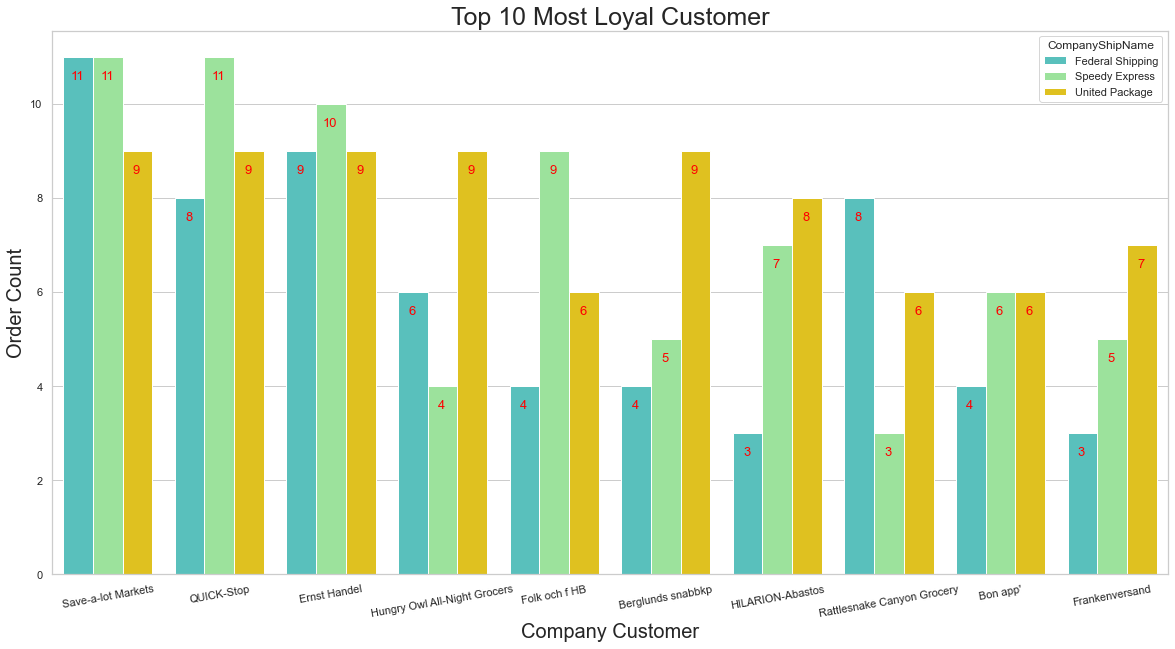

In [33]:
sns.set_theme(style = "whitegrid", palette = ['mediumturquoise', 'lightgreen', 'gold'])
plt.figure(figsize=(20,10))
ax = sns.countplot(table2['CompanyCustomerName'], hue = table2['CompanyShipName'],
            order = table2['CompanyCustomerName'].value_counts().head(10).index)
plt.xlabel('Company Customer', size = 20)
plt.ylabel('Order Count', size = 20)
plt.title ('Top 10 Most Loyal Customer', size = 25)
plt.xticks(rotation=10)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.125, p.get_height()), ha='center', va='top', color='red', size=13)
    
plt.show()

Barchart diatas menunjukkan atau menjelaskan jumlah order dari masing-masing costumer berdasarkan jenis Company Ship. Berdasarkan grafik di atas Costumer &#39;Save-a-lot Markets&#39; merupakan Costumer yang memiliki jumlah pesanan terbesar dengan nilai dari masing-masing company ship yaitu &#39;Federal Shipping&#39; dan &#39;Speedy Express&#39; mencapai 11, sedangkan &#39;United Express&#39; mencapai 9. Sedangkan, Customer &#39;Frankeversand&#39; merupakan customer yang memiliki value order terkecil bila dibandingkan dengan customer lainnya.

Masing-masing Company Ship memiliki nilai yang bervariasi pada masing-masing Costumer. Company Ship &#39;Federal Shipping&#39; memiliki jumlah pesanan tertinggi pada 2 Costumer yaitu &#39;Save-a-lot Markets&#39; dan &#39;Rafflesnake Canyon Grocery&#39;. Company Ship &#39;Speedy Ekspress&#39; memiliki nilai pesanan tertinggi pada 5 Costumer, yaitu &#39;Save-a-lot Markets&#39;, &#39;QUICK-Stop&#39;, &#39;Ernst Handel&#39;, &#39;Folk och f HB&#39;, dan &#39;Bon app&#39;&#39;. Company Ship &#39;United Package&#39; juga memiliki nilai pesanan tertinggi pada 5 Costumer.

Berdasarkan data di atas, meskipun Company Ship &#39;Federal Express&#39; sudah mendominasi pada 2 dari 10 Costumer, perlu dilakukan beberapa penekanan untuk meningkatkan daya tarik dari Costumer dalam memakai Company Ship &#39;Federal Express&#39;. Seperti dengan memberikan diskon atau dengan memberikan potongan khusus keanggotaan bagi Costumer yang sudah membeli barang dengan biaya yang sangat besar dan jumlah transaksi yang banyak.

## **Most Shipped Country**

Pembuatan tabel ```TP_Count_ShipCountry``` berisikan informasi terkait total harga yang dibayar per negara (TotalPrice) dan jumlah pengiriman barang ke setiap negara (ShipCount). 

In [34]:
# Create Total Price per Shipped Country
TotalPrice_ShipCountry = table2[['TotalPrice']].groupby(table2['ShipCountry']).sum().sort_values('TotalPrice')

# Create Count of Shipped Country
Count_ShipCountry = pd.DataFrame({'ShipCount': table2[['ShipCountry']].value_counts().sort_values()})

# Merge 2 table (TotalPrice_ShipCountry and ValueCount_ShipCountry)
TP_Count_ShipCountry = pd.merge(TotalPrice_ShipCountry, Count_ShipCountry, how="outer", on="ShipCountry").sort_values(by='ShipCount', ascending=False).reset_index()
TP_Count_ShipCountry.head()

,ShipCountry,TotalPrice,ShipCount
0,Germany,241909.13,120
1,USA,261482.38,119
2,Brazil,110745.68,81
3,France,84396.76,75
4,UK,60616.51,56


In [35]:
# Create Bar Chart
fig = px.bar(TP_Count_ShipCountry, x='ShipCountry', y='ShipCount',
             hover_data=['ShipCount','TotalPrice'], color='ShipCount',
             labels={'Most Shipped Country'}, height=600, color_continuous_scale='temps',
             title='Bar Chart Most Shipped Country')
fig.show()

Berdasarkan barchart Most Shipped Country, jumlah negara tujuan kiriman barang yaitu 20 negara. 5 negara dengan jumlah tujuan pengiriman barang terbanyak yaitu Germany (119), USA (120), Brazil (81), France (75), dan UK (56). Sedangkan 5 negara dengan jumlah tujuan pengiriman barang terkecil yaitu Norway (6), Poland (7), Portugal (13), Argentina (14), dan Switzerland (17) atau Denmark (17).

Germany dan USA melalui data yang ditampilkan dapat dijadikan sebagai acuan untuk membangun Head Office/Headquarter atau pusat produksi/gudang di kedua negara tersebut. Hal ini untuk meningkatkan efisiensi manajemen pengiriman barang di negara dengan frekuensi pengiriman barang yang sangat tinggi. Efisiensi ini akan meningkatkan pendapatan, mengurangi resiko fraud pengiriman barang dan peningkatan jangkauan pemasaran. Negara seperti Norway dan Poland juga dapat dilakukan dengan pengurangan jumlah kantor cabang yang disesuaikan dengan jumlah pengiriman barang ini dapat mengurangi beban biaya operasional. 

Strategic planning yang dapat dilakukan yaitu:
1. Membangun Head Office/Headquarter dan pusat produksi/gudang di Germany atau USA (negara tujuan pengiriman terbanyak).
2. Membangun kantor cabang setingkat regional di Brazil (Kawasan benua South America) dan France (Kawasan benua Europe).
3. Menargetkan untuk setiap benua terdapat 1 kantor cabang dan 1 tempat produksi/gudang agar tingkat pemasaran berkembang pesat dan mencakup seluruh dunia.
4. Mereduksi jumlah kantor cabang berlebih yang disesuaikan pada negara tujuan pengiriman terkecil agar menurunkan atau menghemat biaya operasional.

## **Treemap of Total Price and Freight in Shipped City**

In [36]:
# Create Treemap
fig = px.treemap(table2, path=[px.Constant("World"), 'ShipCountry', 'ShipCity'], values='TotalPrice',
                  color='Freight', hover_data=['ShipCity'],
                  color_continuous_scale='earth',
                  color_continuous_midpoint=np.average(table2['Freight'], weights=table2['TotalPrice']),
                  title='Treemap of Total Price and Freight in Shipped City')
fig.update_layout(margin = dict(t=50, l=0, r=25, b=0))
fig.show()

Berdasarkan Treemap of Total Price and Freight in Shipped City ini terdapat 2 variabel yang dapat diamati yaitu Total Price dan Freight. Negara dengan Total Price tertinggi yaitu USA (261,482.38 USD) dan Germany (241,909.13 USD). Sedangkan negara dengan Total Price terendah yaitu Poland (3,531.95 USD) dan Norway (5,735.15 USD). Jika diamati pada kota dengan Total Price tertinggi yaitu Cunewalde, Germany (117,483.39 USD) dan Boise, USA (115,673.39 USD). Sedangkan pada kota dengan Total Price terendah yaitu Barcelona, Spain (836.7 USD) dan Torina, Italy (1,545.7 USD).

Negara dengan Freight tertinggi yaitu Austria (288 USD) dan Ireland (280.37 USD). Sedangkan negara dengan Freight terendah yaitu Poland (30.78 USD) dan Italy (59.71 USD). Jika diamati pada kota dengan Freight tertinggi yaitu Eugene, USA (378.22 USD) dan Cunewalde, Germany (333.97 USD). Sedangkan pada kota dengan Freight terendah yaitu Barcelona, Spain (10.74 USD) dan Helsinki, Finland (13.72 USD).

Strategic planning yang dapat dilakukan yaitu:
1. Membangun Head Office/Headquarter dan pusat produksi/gudang di Cunewalde, Germany atau Boise, USA (negara dengan Total Price tertinggi).
2. Membangun kantor cabang setingkat kota dengan Freight tertinggi untuk meringankan beban pelanggan dalam mengirimkan barangnya seperti kota Eugene, USA atau Cunewalde, Germany.

## **Geocode Data for Creating Maps**

Data ```table2``` tidak memiliki nilai latitude dan longitude atau X,Y yang dapat menyatakan lokasi geografis secara absolut. Oleh karena itu, data yang terdapat pada ```table2``` secara eksisting tidak dapat divisualisikan dengan peta. Kita membutuhkan metode untuk mendapatkan informasi geografi secara absolut seperti metode geocoding. Geocoding merupakan metode untuk merubah nama alamat yang terdapat di muka bumi menjadi nilai koordinat yang absolut seperti latitude dan longitude.

Pembuatan kolom Geocode ini terdiri dari gabungan dari kolom ShipCity dan ShipCountry yang akan menjadikan alamat di muka bumi yang berstandar. Kolom ShipAddress tidak digunakan karena tidak memiliki standar alamat yang dapat dibaca dengan baik oleh sistem geocoding yang akan digunakan yaitu Nominatim dari OpenStreetMap.

In [37]:
# Create Geocode Column
table2[['Geocode']] = pd.DataFrame(table2['ShipCity'] + ', ' + table2['ShipCountry']).astype(str)

Pembuatan tabel Kolom ```TotalPrice_Geocode``` berisikan data TotalPrice yang akan dijumlahkan berdasarkan pengelompokan menggunakan kolom Geocode. Hal ini dikarenakan jumlah baris pada ```table2``` berjumlah > 800 baris yang menyebabkan proses geocoding pada Nominatim menjadi tidak berjalan. Proses geocoding pada Nominatim ini menggunakan API yang open source atau gratis sehingga memiliki keterbatasan jumlah iterasi proses geocoding.  

In [38]:
# Sum TotalPrice and Group by Geocode
TotalPrice_Geocode = table2[['TotalPrice']].groupby(table2['Geocode']).sum().sort_values('TotalPrice').reset_index()
TotalPrice_Geocode

,Geocode,TotalPrice
0,"Walla Walla, USA",357.00
1,"Vancouver, Canada",522.50
2,"Barcelona, Spain",836.70
3,"Reims, France",1480.00
4,"Caracas, Venezuela",1488.70
...,...,...
65,"Rio de Janeiro, Brazil",52161.18
66,"Cork, Ireland",57317.39
67,"Graz, Austria",103115.18
68,"Boise, USA",115673.39


Jumlah baris pada tabel ```TotalPrice_Geocode``` yaitu 70 baris sehingga dapat dilakukan proses geocoding.

In [42]:
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium
from folium.plugins import FastMarkerCluster

In [43]:
from geopy.extra.rate_limiter import RateLimiter
locator = Nominatim(user_agent="myGeocoder")

# Conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

# Create location column
TotalPrice_Geocode['location'] = TotalPrice_Geocode['Geocode'].apply(geocode)

# Create longitude, laatitude and altitude from location column (returns tuple)
TotalPrice_Geocode['point'] = TotalPrice_Geocode['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [44]:
# Split point column into latitude, longitude and altitude columns
TotalPrice_Geocode[['latitude', 'longitude', 'altitude']] = pd.DataFrame(TotalPrice_Geocode['point'].tolist(), index=TotalPrice_Geocode.index)

In [45]:
# Drop useless column (location and point)
TotalPrice_Geocode = TotalPrice_Geocode.drop(['location', 'point'], axis=1)

In [46]:
# Check null data in latitude and longitude
TotalPrice_Geocode[['latitude', 'longitude']].isnull().sum()

latitude     9
longitude    9
dtype: int64

In [47]:
# Delete row data where latitude is null
TotalPrice_Geocode = TotalPrice_Geocode[pd.notnull(TotalPrice_Geocode['latitude'])]
TotalPrice_Geocode

,Geocode,TotalPrice,latitude,longitude,altitude
0,"Walla Walla, USA",357.00,46.066728,-118.339346,0.0
1,"Vancouver, Canada",522.50,49.260872,-123.113952,0.0
2,"Barcelona, Spain",836.70,41.382894,2.177432,0.0
3,"Reims, France",1480.00,49.257789,4.031926,0.0
4,"Caracas, Venezuela",1488.70,10.506098,-66.914602,0.0
...,...,...,...,...,...
65,"Rio de Janeiro, Brazil",52161.18,-22.911014,-43.209373,0.0
66,"Cork, Ireland",57317.39,51.897077,-8.465467,0.0
67,"Graz, Austria",103115.18,47.070868,15.438279,0.0
68,"Boise, USA",115673.39,43.616616,-116.200886,0.0


Jumlah baris setelah pengolahan sampai mendapatkan informasi nilai lokasi absolut atau koordinat seperti latitude dan longitude pada tabel ```TotalPrice_Geocode``` berjumlah 61 baris. Jumlah baris pada tabel ```TotalPrice_Geocode``` sebelum dilakukan penghapusan nilai null data yaitu 70 baris.

## **Shipped City Point Map**

In [48]:
# Create Basemap
folium_map = folium.Map(location=[36.686283678638816, -42.10011247132088],
                        zoom_start=2,
                        tiles='CartoDB dark_matter')

# Create Point Map
FastMarkerCluster(data=list(zip(TotalPrice_Geocode['latitude'].values, TotalPrice_Geocode['longitude'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map

Peta yang tertampil di atas merupakan peta sebaran titik lokasi Shipped City. Peta sebaran titik ini dapat memberikan informasi terkait sebaran lokasi Shipped City secara absolut dengan mudah dipahami. Berdasarkan peta sebaran titik, sebaran lokasi Shipped City ini tersebar di 3 benua yaitu North America, South America dan Europe. Masing-masing lokasi tersebar di Europe (41 kota), North America (13 kota) dan South America (7 kota). Negara dengan lokasi Shipped City yaitu USA (13 kota). Selain itu, di benua Europe didominasi oleh negara bagian Eropa Barat seperti Spanyol, Prancis, Jerman, Belanda, Italia dan Belgia.

## **Density of Total Price Shipped City Map**

In [49]:
import plotly.graph_objects as go

# Create Density Map
fig = go.Figure(go.Densitymapbox(lat=TotalPrice_Geocode['latitude'], 
                                 lon=TotalPrice_Geocode['longitude'], 
                                 z=TotalPrice_Geocode['TotalPrice'],
                                 radius=13, 
                                 colorscale='Jet',
                                 ))
fig.update_layout(mapbox_style="carto-positron", 
                  mapbox_center_lat = 40.46715359649241, 
                  mapbox_center_lon= -39.855600611564896
                 )
fig.update_layout(margin=
                  {"r":0,"t":0,"l":0,"b":0}
                 )
fig.show()

Peta densitas ini menampilkan sebaran titik Shipped City dengan densitas Total Price. Peta densitas dapat membuat pembaca akan secara cepat dan tepat memahami Total Price tertinggi dan terendah di setiap wilayah yang terdapat pada data tabel ```TotalPrice_Geocode```. Berdasarkan peta densitas yang tertampil, hanya terdapat 3 benua yang memiliki lokasi pengiriman barang yaitu benua North America, South America dan Europe. Kawasan benua Eropa memiliki densitas Total Price tertinggi jika dibandingkan dengan wilayah lainnya. Sedangkan densitas Total Price terendah berada di kawasan South America.

Strategi yang dapat diterapkan melalui analisis ini yaitu frekuensi pengiriman barang di benua Eropa sangat tinggi sehingga dibutuhkan peningkatan manajemen pengiriman barang di kawasan benua Eropa untuk menjaga kualitas pengiriman barang. Peningkatan kualitas pengiriman barang ini akan menjaga frekuensi pengiriman barang di benua Eropa tetap tinggi dan terus meningkat.

## **Status Pengiriman Barang**

In [50]:
# Sunburst Chart Ship Status and Shipper Company
fig = px.sunburst(table2, 
                  path=['ShipStatus', pd.DatetimeIndex(table2['ShippedDate']).year, 'CompanyShipName'], 
                  values='TotalPrice',
                  color='ShipStatus',
                  color_discrete_map={'On Time':'darkblue', 'Late':'red'},
                  title='Sunburst Chart of Total Price on Ship Status',
                  )

fig.update_layout(margin=dict(t=35, l=0, r=0, b=0)).update_traces(texttemplate="%{label}<br>%{percentEntry:.2%}")
fig.show()

Sunburst chart merupakan chart interaktif berbentuk seperti pie chart namun memiliki turunan data. Berdasarkan sunburst chart yang tertampil di atas, data Total Price ini dibagi menjadi 2 bagian utama menggunakan Ship Status yang masing-masing memiliki porsi yaitu On Time (94.5% atau 1,254,721.13 USD) dan Late (5.45% atau 72,293.7 USD). Data Ship Status ini didominasi sangat besar oleh status On Time sehingga kinerja pengiriman barang secara keseluruhan oleh perusahaan kargo/kurir ini dianggap dapat berjalan dengan sangat baik.

Jenis Ship Status On Time ini terbagi menjadi per tahun masing-masing yaitu 1996 (16.24% atau 203,739.8 USD), 1997 (48.22% atau 604,973.01 USD), dan 1998 (33.55% atau 446,008.32 USD). Secara keseluruhan tahun 1996-1998, perusahaan kargo United Package memiliki porsi terbanyak untuk pengiriman barang dengan status On Time masing-masing sebanyak 6.55%, 17.74% dan 17.33%.

Jenis Ship Status Late ini terbagi menjadi per tahun masing-masing yaitu 1996 (8.81% atau 6,372.5 USD), 1997 (60.95% atau 44,065.8 USD), dan 1998 (30.23% atau 21,855.4 USD). Secara keseluruhan tahun 1996-1998, perusahaan kargo United Package memiliki porsi terbanyak untuk pengiriman barang dengan status Late masing-masing sebanyak 3.81%, 22.78% dan 18.51%.

Kesimpulan berdasarkan analisis ini yaitu United Package dengan status On Time dan Late terbesar ini memiliki peran yang dominan terhadap jasa pengiriman barang pada basis data ini. Strategi yang dapat dilakukan berdasarkan analisis ini yaitu melakukan pengawasan/supervisi yang terencana, ketat dan detil terhadap United Package dalam melakukan pengiriman barang karena perusahaan ini mengambil porsi yang dominan.

## **Total Price and Freight 1996-1998 Shipped**

In [51]:
# Create Table yearprof
yearprof = table2[['ShippedDate', 'Freight' ,'TotalPrice']].groupby(pd.DatetimeIndex(table2['ShippedDate']).year).sum()
yearprof

,Freight,TotalPrice
ShippedDate,,
1996,9468.94,210112.30
1997,32164.12,649038.81
1998,22321.96,467863.72


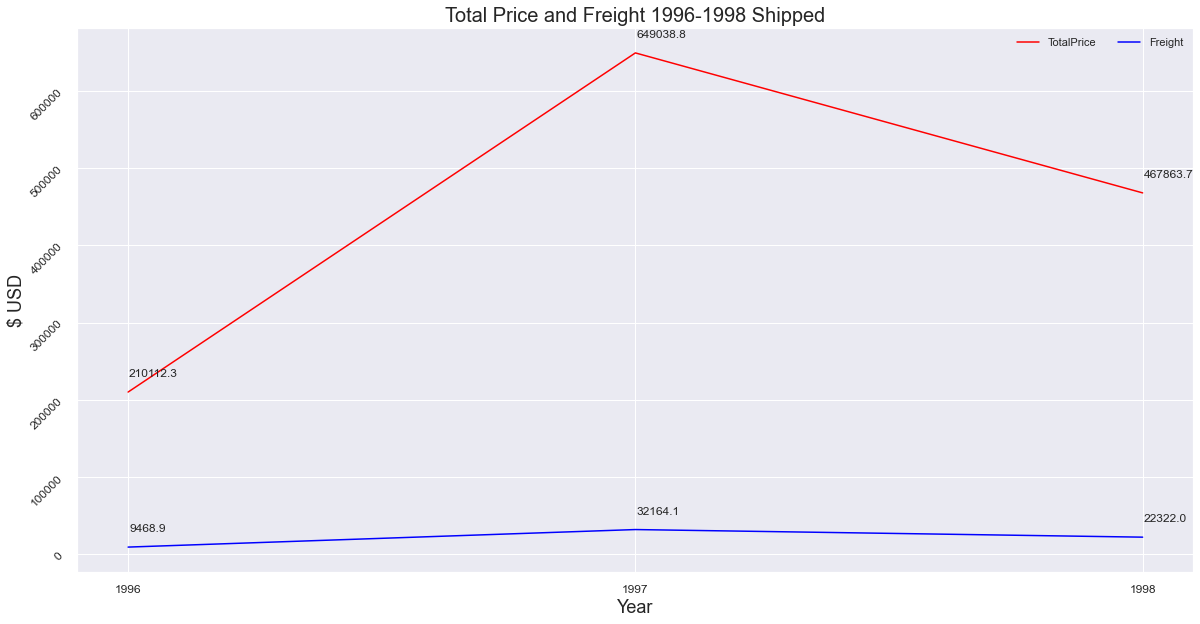

In [52]:
# Line Plot Year By Year Profit

plt.style.use('seaborn')
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
plt.plot(yearprof.index, yearprof['TotalPrice'], color = 'red', label='TotalPrice')
plt.plot(yearprof.index, yearprof['Freight'], color = 'blue', label='Freight')
plt.title('Total Price and Freight 1996-1998 Shipped', size = 20)
plt.xlabel('Year', size = 18)
plt.ylabel('$ USD', size = 18)
plt.xticks(yearprof.index, rotation = 0, size = 12)
plt.yticks(rotation = 45, size = 12)
plt.legend(ncol=3)

for x,y in zip(yearprof.index, round(yearprof['TotalPrice'],1)) :
    plt.annotate(y,
    (x,y),
    textcoords = 'offset pixels',
    xytext = (1,15))

for x,y in zip(yearprof.index, round(yearprof['Freight'],1)) :
    plt.annotate(y,
    (x,y),
    textcoords = 'offset pixels',
    xytext = (1,15))
    
plt.show()

Berdasarkan line chart Total Price and Freight 1996-1998 Shipped, nilai Total Price mengalami peningkatan dan penurunan pada basis data. Rentang tahun 1996-1997, nilai Total Price mengalami peningkatan dari 21011.2 USD ke 649038.8 USD. Rentang tahun 1997-1998, nilai Total Price mengalami penurunan dari 649038.8 USD ke 467863.7 USD. Trend kenaikan dan penurunan juga dialami pada nilai Freight. Rentang tahun 1996-1997, nilai Freight mengalami peningkatan dari 9468.9 USD ke 32164.1 USD. Rentang tahun 1997-1998, nilai Freight mengalami penurunan dari 32164.1 USD ke 22322 USD. Namun jika diamati secara keseluruhan, nilai Total Price dan Freight mengalami pertumbuhan nilai. 

Meski begitu, line chart ini tidak bisa langsung ditarik kesimpulan bahwa tahun 1996 ini dikarenakan dari basisdata yang dimiliki, tahun 1996 ini belum sepenuhnya selesai. Grafik di bawah akan menjelaskan bahwa tahun 1996 berakhir sampai bulan ke 6. Artinya, masih ada 6 bulan pada tahun tersebut, di mana datanya masih belum tersedia.

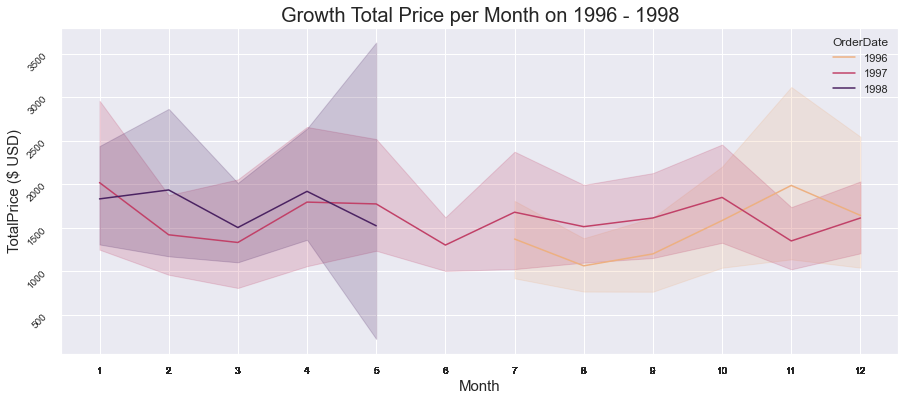

In [53]:
# Line Plot Profit Each Month

plt.figure(figsize=(15,6))
sns.lineplot(data=table2, x=pd.DatetimeIndex(table2['OrderDate']).month, y='TotalPrice', hue = pd.DatetimeIndex(table2['OrderDate']).year, palette = 'flare')
plt.title('Growth Total Price per Month on 1996 - 1998', size = 20)
plt.xlabel('Month', size = 15)
plt.ylabel('TotalPrice ($ USD)', size = 15)
plt.xticks(pd.DatetimeIndex(table2['OrderDate']).month, size = 10)
plt.yticks(rotation = 45, size = 10)
plt.show()

Berdasarkan analisis menggunakan line chart Growth Total Price per Month on 1996 - 1998, pada tiap bulannya nilai Total Price mengalami peningkatan dengan periode 1996-1998. Hal ini dapat diamati pada bulan 1-6 dengan perbandingan tahun 1997-1998, nilai Total Price tahun 1998 didominasi lebih tinggi jika dibandingkan tahun 1997. Begitu pula pada bulan 7-12 dengan perbandingan tahun 1996-1997, nilai Total Price tahun 1997 didominasi lebih tinggi jika dibandingkan tahun 1996.

# **Statistics**
1. Bagaimana karakteristik distribusi data TotalPrice dan Freight? Jelaskan dengan menggunakan grafik dan uji normalitas!
2. Terdapat 3 perusahaan kargo, apakah terdapat perbedaan nilai Freight antar setiap perusahaan kargo tersebut? Buktikan.
3. Apakah terdapat hubungan antara TotalPrice dengan Freight? Berapa tingkat nilai hubungannya? Bagaimana arah hubungannya antar keduanya? Gambarkan bentuk hubungannya.

## **Distribution Total Price and Freight**

<Figure size 720x720 with 0 Axes>

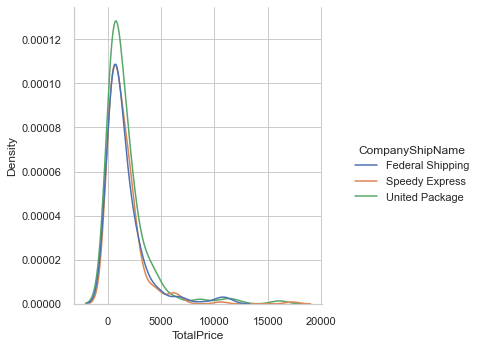

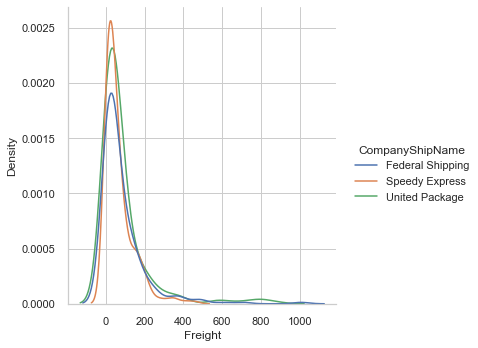

In [54]:
# Distribution Plot TotalPrice and Freight

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,10))
sns.displot(x=table2['TotalPrice'], hue='CompanyShipName', data=table2, kind='kde')
sns.displot(x='Freight', hue='CompanyShipName', data=table2, kind='kde');
plt.show()

Berdasarkan kedua distribution plot yaitu TotalPrice dan Freight memiliki kesamaan bentuk. Bentuk dari kedua distribution plot tersebut yaitu Right-Skewed (Positive Skewness). Right-Skewed memiliki karakteristik yaitu jumlah modus lebih banyak daripada median. Sedangkan jumlah median lebih banyak daripada rata-rata. Kesimpulannya berdasarkan bentuk skewness, data TotalPrice dan Freight tidak berdistribusi normal sehingga pengolahan analisis statistiknya menggunakan statistik non parameterik.

## **Normality Test Total Price and Freight**

In [55]:
# Normality Test TotalPrice

from scipy.stats import shapiro

norm, pval = shapiro(table2['TotalPrice'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('Data Tidak Berdistribusi Normal')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('Data Berdistribusi Normal')

Tolak H0 Karena P-Value (2.679772557732178e-37 < 5%)
Data Tidak Berdistribusi Normal


In [56]:
# Normality Test Freight

from scipy.stats import shapiro

norm, pval = shapiro(table2['Freight'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('Data Tidak Berdistribusi Normal')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('Data Berdistribusi Normal')

Tolak H0 Karena P-Value (4.7765696415839315e-39 < 5%)
Data Tidak Berdistribusi Normal


## **Hypothesis Testing for Freight**

In [57]:
# Freight is Non-Parametric Data
# Hypothesis Testing Freight Between Company Shipper (Kruskal Wallis)

from scipy.stats import kruskal

krus, pvalkrus = kruskal(
    table2[table2['CompanyShipName'] == 'Federal Shipping']['Freight'],
    table2[table2['CompanyShipName'] == 'Speedy Express']['Freight'],
    table2[table2['CompanyShipName'] == 'United Package']['Freight'],
) 

if pvalkrus < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pvalkrus} < 5%)')
    print ('Terdapat Perbedaan Nilai Median Freight pada Setiap Perusahaan Kargo')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pvalkrus} > 5%)')
    print ('Tidak Terdapat Perbedaan Nilai Median Freight pada Setiap Perusahaan Kargo')

Gagal Tolak H0 Karena P-Value (0.8466021172435763 > 5%)
Tidak Terdapat Perbedaan Nilai Median Freight pada Setiap Perusahaan Kargo


## **Correlation Between Freight and Freight**

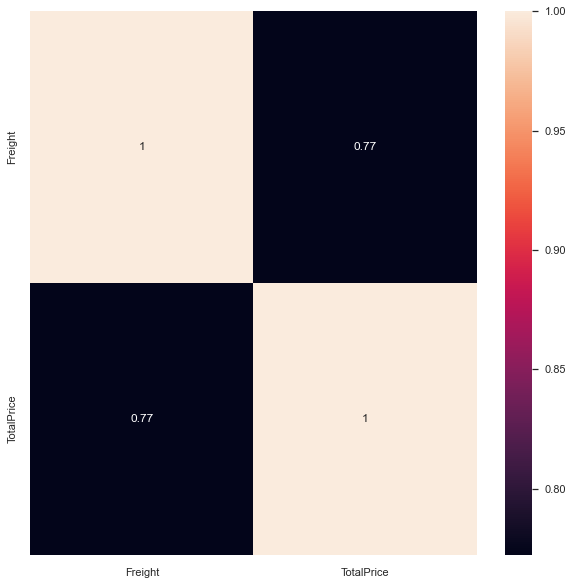

In [58]:
# Freight is Non-Parametric Data
# Correlation Between Freight and TotalPrice with Heatmap (Spearman)

plt.figure(figsize=(10,10))
sns.heatmap(table2[['Freight', 'TotalPrice']].corr('spearman'), annot=True)
plt.show()

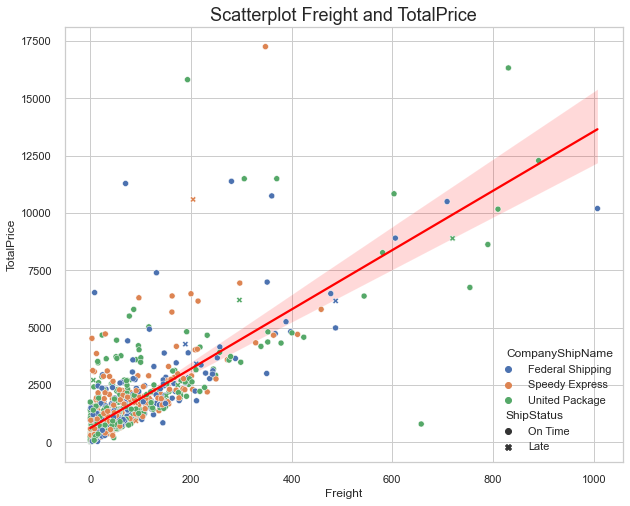

In [59]:
# Scatterplot/Regplot Between Freight and TotalPrice

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,8))
sns.regplot(table2['Freight'], table2['TotalPrice'], color='Red', scatter_kws = {'s':0.1})
sns.scatterplot(table2['Freight'], table2['TotalPrice'], hue = table2['CompanyShipName'], style = table2['ShipStatus'])
plt.title('Scatterplot Freight and TotalPrice', size = 18)
plt.show()

Berdasarkan perhitungan korelasi menggunakan metode Spearman antara Freight dan TotalPrice menghasilkan nilai 77% atau 0,77. Nilai tersebut mengindikasi tingkat korelasi yang cukup kuat antara kedua data tersebut sebesar 77%. Penggunaan metode Spearman pada perhitungan korelasi antar variabel ini karena kedua variabel tersebut memiliki data yang tidak berdistribusi normal. Hal tersebut diharuskan menggunakan perhitungan statistik non-parametrik. Berdasarkan regression plot dan scatter plot, hubungan antara Freight dan TotalPrice yaitu positif. Hubungan yang positif ini dapat diartikan jika semakin tinggi nilai Freight maka semakin tinggi juga nilai TotalPrice.